# Project: Time Series Analysis of NAICS


# Prepare and Clean the DATA

In [1]:
#Imporing the Libararies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
#read the flat files as data 
lmo_detailed_industries= pd.read_excel('LMO_Detailed_Industries_by_NAICS.xlsx')
lmo_detailed_industries.head(10)

,LMO_Detailed_Industry,NAICS
0,Farms,111 & 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211
5,Support activities for mining and oil and gas ...,213
6,Mining,212
7,Utilities,22
8,Construction,23
9,"Food, beverage and tobacco manufacturing",311 & 312


In [3]:
#cleaning the 'NAICS'column
lmo_detailed_industries['NAICS']=lmo_detailed_industries.NAICS.astype(str).str.replace('&',',')
lmo_detailed_industries.head(10)

,LMO_Detailed_Industry,NAICS
0,Farms,"111 , 112"
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211
5,Support activities for mining and oil and gas ...,213
6,Mining,212
7,Utilities,22
8,Construction,23
9,"Food, beverage and tobacco manufacturing","311 , 312"


In [4]:
#creat a function to read our rtra files
def read_files(dataframe,list_p):
    """"
      The function will read our RTRA files and 
      create a dataframe out of the data
      
      Args:
      -----------------------------------------
      dataframe: A dataframe containing the first file
      list_p: list of the rest of the files
     
      Returns:
      ----------------------------------------
      Dataframe
      """
    for file in list_p:
        df= pd.read_csv(file)
        dataframe=dataframe.append(df,ignore_index=True)
    return dataframe

In [5]:
#read 2-digit RTRA FILES
df_2_naics = pd.read_csv('RTRA_Employ_2NAICS_97_99.csv')

list_2_digit_Naics= ['RTRA_Employ_2NAICS_00_05.csv',
                     'RTRA_Employ_2NAICS_06_10.csv',
                     'RTRA_Employ_2NAICS_11_15.csv',
                     'RTRA_Employ_2NAICS_16_20.csv'
                    ]
df_2_naics= read_files(df_2_naics,list_2_digit_Naics)
        
df_2_naics.tail()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5467,2019,12,"Real estate, rental and leasing [53]",0
5468,2019,12,Retail trade [44-45],0
5469,2019,12,Transportation and warehousing [48-49],0
5470,2019,12,Utilities [22],0
5471,2019,12,Wholesale trade [41],0


In [17]:
def clean_col (df):
    """"
      The function will clean the columns of our DF's
      
      Args:
      -----------------------------------------
      df: A dataframe 
     
      Returns:
      ----------------------------------------
      Dataframe  
      """"
    df1 = pd.DataFrame(df.NAICS.astype('str').str.split('[').to_list(), columns=['NAICS','NAICS_CODE'])
    df1['NAICS_CODE']= df1.NAICS_CODE.astype('str').str.strip(']').str.replace('-',',')
    df['NAICS']=df1['NAICS']
    df['NAICS_CODE']= df1['NAICS_CODE']
    return df

In [18]:
#applying the fct on our df
clean_col(df_2_naics)
df_2_naics.head(10)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_CODE
0,1997,1,Accommodation and food services,129250,72
1,1997,1,"Administrative and support, waste management a...",58500,56
2,1997,1,"Agriculture, forestry, fishing and hunting",62250,11
3,1997,1,"Arts, entertainment and recreation",38750,71
4,1997,1,Construction,118000,23
5,1997,1,Educational services,118750,61
6,1997,1,Finance and insurance,77500,52
7,1997,1,Health care and social assistance,183000,62
8,1997,1,Information and cultural industries,40500,51
9,1997,1,Management of companies and enterprises,1750,55


In [19]:
#left merging the df_2_naics with lmo_detailed_industries 
df1= df_2_naics.merge(lmo_detailed_industries, left_on='NAICS_CODE', right_on='NAICS', how='left').drop(columns=['NAICS_x','NAICS_y'],axis=1)

df1.tail(10)

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
5462,2019,12,0,"31,33",NaN
5463,2019,12,0,21,NaN
5464,2019,12,0,81,"Repair, personal and non-profit services"
5465,2019,12,0,54,NaN
5466,2019,12,0,91,NaN
5467,2019,12,0,53,Real estate rental and leasing
5468,2019,12,0,"44,45",NaN
5469,2019,12,0,"48,49",NaN
5470,2019,12,0,22,Utilities
5471,2019,12,0,41,Wholesale trade


In [21]:
def index_datetime(df):
    """"
      The function will create a datetime indexto a dataframe
      
      Args:
      -----------------------------------------
      df: A dataframe 
     
      Returns:
      ----------------------------------------
      Dataframe  
      """
    combined= df.SMTH.astype('str').str.cat(df.SYEAR.astype('str'),sep=' ')
    df['DATE']= pd.to_datetime(combined).dt.strftime('%Y-%m')
    df.set_index('DATE',inplace=True)
    return df

In [22]:
#applying the function int our  df
df1 = index_datetime(df1).dropna()
df1

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
DATE,,,,,
1997-01,1997,1,118000,23,Construction
1997-01,1997,1,89250,81,"Repair, personal and non-profit services"
1997-01,1997,1,50750,53,Real estate rental and leasing
1997-01,1997,1,9750,22,Utilities
1997-01,1997,1,72000,41,Wholesale trade
...,...,...,...,...,...
2019-12,2019,12,0,23,Construction
2019-12,2019,12,0,81,"Repair, personal and non-profit services"
2019-12,2019,12,0,53,Real estate rental and leasing


In [23]:
#read 3-digit RTRA FILES
df_3_naics = pd.read_csv('RTRA_Employ_3NAICS_97_99.csv')

list_3_digit_Naics= ['RTRA_Employ_3NAICS_00_05.csv',
                     'RTRA_Employ_3NAICS_06_10.csv',
                     'RTRA_Employ_3NAICS_11_15.csv',
                     'RTRA_Employ_3NAICS_16_20.csv']
df_3_naics=read_files(df_3_naics,list_3_digit_Naics)
df_3_naics.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,Aboriginal public administration[914],500
1,1997,1,Accommodation services[721],24000
2,1997,1,Administrative and support services[561],56750
3,1997,1,Air transportation[481],17000
4,1997,1,Ambulatory health care services[621],40000


In [24]:
clean_col(df_3_naics)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_CODE
0,1997,1,Aboriginal public administration,500,914
1,1997,1,Accommodation services,24000,721
2,1997,1,Administrative and support services,56750,561
3,1997,1,Air transportation,17000,481
4,1997,1,Ambulatory health care services,40000,621
...,...,...,...,...,...
28135,2019,12,Utilities,0,221
28136,2019,12,Warehousing and storage,0,493
28137,2019,12,Waste management and remediation services,0,562
28138,2019,12,Water transportation,0,483


In [32]:
df2= df_3_naics.merge(lmo_detailed_industries, left_on='NAICS_CODE', right_on='NAICS', how='left').drop(columns=['NAICS_x','NAICS_y'],axis=1)

df2.tail()

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
28135,2019,12,0,221,NaN
28136,2019,12,0,493,Warehousing and storage
28137,2019,12,0,562,NaN
28138,2019,12,0,483,Water transportation
28139,2019,12,0,321,Wood product manufacturing


In [33]:
df2= index_datetime(df2).dropna()
df2

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
DATE,,,,,
1997-01,1997,1,24000,721,Accommodation services
1997-01,1997,1,17000,481,Air transportation
1997-01,1997,1,40000,621,Ambulatory health care services
1997-01,1997,1,20000,713,"Amusement, gambling and recreation industries"
1997-01,1997,1,11750,332,Fabricated metal product manufacturing
...,...,...,...,...,...
2019-12,2019,12,0,517,Telecommunications
2019-12,2019,12,0,484,Truck transportation
2019-12,2019,12,0,493,Warehousing and storage


In [27]:
#read 4-digit RTRA FILES
df_4_naics = pd.read_csv('RTRA_Employ_4NAICS_97_99.csv')

list_4_digit_Naics= ['RTRA_Employ_4NAICS_00_05.csv',
                     'RTRA_Employ_4NAICS_06_10.csv',
                     'RTRA_Employ_4NAICS_11_15.csv',
                     'RTRA_Employ_4NAICS_16_20.csv']
df_4_naics=read_files(df_4_naics,list_4_digit_Naics)
df_4_naics['NAICS_CODE']=df_4_naics.NAICS.astype('str')
df_4_naics.drop('NAICS',axis=1,inplace=True)
df_4_naics

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE
0,1997,1,3500,1100
1,1997,1,250,1111
2,1997,1,500,1112
3,1997,1,2250,1113
4,1997,1,5250,1114
...,...,...,...,...
85567,2019,12,0,9111
85568,2019,12,0,9120
85569,2019,12,0,9130
85570,2019,12,0,9141


In [28]:
df3= df_4_naics.merge(lmo_detailed_industries, left_on='NAICS_CODE', right_on='NAICS', how='left').drop('NAICS',axis=1)

df3

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
0,1997,1,3500,1100,NaN
1,1997,1,250,1111,NaN
2,1997,1,500,1112,NaN
3,1997,1,2250,1113,NaN
4,1997,1,5250,1114,NaN
...,...,...,...,...,...
85567,2019,12,0,9111,NaN
85568,2019,12,0,9120,NaN
85569,2019,12,0,9130,NaN
85570,2019,12,0,9141,NaN


In [29]:
df3= index_datetime(df3).dropna()
df3

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
DATE,,,,,
1997-01,1997,1,3500,3366,Ship and boat building
1997-01,1997,1,27000,5413,"Architectural, engineering and related services"
1997-01,1997,1,18250,5415,Computer systems design and related services
1997-01,1997,1,16250,5416,"Management, scientific and technical consultin..."
1997-01,1997,1,78250,6111,Elementary and secondary schools
...,...,...,...,...,...
2019-12,2019,12,0,5415,Computer systems design and related services
2019-12,2019,12,0,5416,"Management, scientific and technical consultin..."
2019-12,2019,12,0,6111,Elementary and secondary schools


In [34]:
#appending our df's into one
df=df1.append(df2)
DF_NAICS=df.append(df3)
DF_NAICS

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
DATE,,,,,
1997-01,1997,1,118000,23,Construction
1997-01,1997,1,89250,81,"Repair, personal and non-profit services"
1997-01,1997,1,50750,53,Real estate rental and leasing
1997-01,1997,1,9750,22,Utilities
1997-01,1997,1,72000,41,Wholesale trade
...,...,...,...,...,...
2019-12,2019,12,0,5415,Computer systems design and related services
2019-12,2019,12,0,5416,"Management, scientific and technical consultin..."
2019-12,2019,12,0,6111,Elementary and secondary schools


In [35]:
#filtering our df 
DF_NAICS_97_18= DF_NAICS[~((DF_NAICS.index).astype('str')>'2019')]
DF_NAICS_97_18

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
DATE,,,,,
1997-01,1997,1,118000,23,Construction
1997-01,1997,1,89250,81,"Repair, personal and non-profit services"
1997-01,1997,1,50750,53,Real estate rental and leasing
1997-01,1997,1,9750,22,Utilities
1997-01,1997,1,72000,41,Wholesale trade
...,...,...,...,...,...
2018-12,2018,12,61500,5415,Computer systems design and related services
2018-12,2018,12,23750,5416,"Management, scientific and technical consultin..."
2018-12,2018,12,94250,6111,Elementary and secondary schools


In [36]:
#read the flat files as data 
data_output= pd.read_excel('Data_Output_Template.xlsx')
data_output

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,NaN
1,1997,1,Air transportation,NaN
2,1997,1,Ambulatory health care services,NaN
3,1997,1,"Amusement, gambling and recreation industries",NaN
4,1997,1,"Architectural, engineering and related services",NaN
...,...,...,...,...
15571,2018,12,Utilities,NaN
15572,2018,12,Warehousing and storage,NaN
15573,2018,12,Water transportation,NaN
15574,2018,12,Wholesale trade,NaN


In [37]:
#set datetime index
data_output= index_datetime(data_output)
data_output

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
DATE,,,,
1997-01,1997,1,Accommodation services,NaN
1997-01,1997,1,Air transportation,NaN
1997-01,1997,1,Ambulatory health care services,NaN
1997-01,1997,1,"Amusement, gambling and recreation industries",NaN
1997-01,1997,1,"Architectural, engineering and related services",NaN
...,...,...,...,...
2018-12,2018,12,Utilities,NaN
2018-12,2018,12,Warehousing and storage,NaN
2018-12,2018,12,Water transportation,NaN


In [38]:
#merge
DF_OUTPUT= data_output.merge(DF_NAICS_97_18, left_on=['DATE','LMO_Detailed_Industry'], right_on=['DATE','LMO_Detailed_Industry'], how='left').drop(columns=['SYEAR_y','SMTH_y'],axis=1)

DF_OUTPUT['Employment']=DF_OUTPUT._EMPLOYMENT_
DF_OUTPUT= DF_OUTPUT.drop('_EMPLOYMENT_',axis=1)
DF_OUTPUT.rename(columns={'SYEAR_x': 'SYEAR', 'SMTH_x':'SMTH'},inplace=True)
DF_OUTPUT

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,NAICS_CODE
DATE,,,,,
1997-01,1997,1,Accommodation services,24000.0,721
1997-01,1997,1,Air transportation,17000.0,481
1997-01,1997,1,Ambulatory health care services,40000.0,621
1997-01,1997,1,"Amusement, gambling and recreation industries",20000.0,713
1997-01,1997,1,"Architectural, engineering and related services",27000.0,5413
...,...,...,...,...,...
2018-12,2018,12,Utilities,12250.0,22
2018-12,2018,12,Warehousing and storage,8750.0,493
2018-12,2018,12,Water transportation,5000.0,483


In [39]:
#checking if there's any missing values
DF_OUTPUT.isnull().sum()

SYEAR                       0
SMTH                        0
LMO_Detailed_Industry       0
Employment               3432
NAICS_CODE               3432
dtype: int64

In [40]:
#filling the missing values
DF_OUTPUT['Employment']=DF_OUTPUT['Employment'].fillna(0).astype(int)
DF_OUTPUT['NAICS_CODE']=DF_OUTPUT['NAICS_CODE'].fillna(0).astype(int)

In [41]:
DF_OUTPUT

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,NAICS_CODE
DATE,,,,,
1997-01,1997,1,Accommodation services,24000,721
1997-01,1997,1,Air transportation,17000,481
1997-01,1997,1,Ambulatory health care services,40000,621
1997-01,1997,1,"Amusement, gambling and recreation industries",20000,713
1997-01,1997,1,"Architectural, engineering and related services",27000,5413
...,...,...,...,...,...
2018-12,2018,12,Utilities,12250,22
2018-12,2018,12,Warehousing and storage,8750,493
2018-12,2018,12,Water transportation,5000,483


In [48]:
#saving our df into a file
DF_OUTPUT.to_excel('Data_Output.xlsx')

# Exploratory Analysis

1- HOW DID THE EMPLOYMENT EVOLVED OVER TIME ACROSS ALL INDUSTRIES?

In [50]:
employment_years=DF_OUTPUT.groupby('SYEAR')['Employment'].mean()
employment_years.head()

SYEAR
1997    21748.587571
1998    21540.960452
1999    22214.336158
2000    22542.725989
2001    22510.240113
Name: Employment, dtype: float64

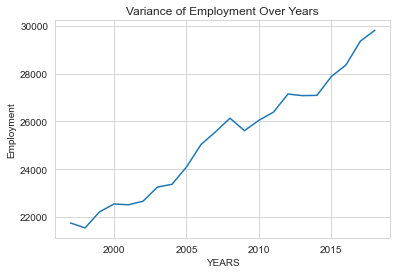

In [73]:
#lineplot
sns.set_style('whitegrid')
sns.lineplot(data=employment_years)
plt.title('Variance of Employment Over Years')
plt.xlabel('YEARS')
plt.ylabel('Employment')
plt.show()

2- What is the eolution of the employment's frequency over the months of each year? 

[Text(0.5, 24.0, 'YEARS'), Text(69.0, 0.5, 'MONTHS')]

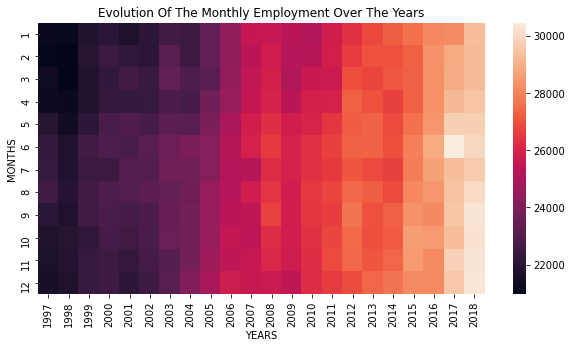

In [52]:
plt.figure(figsize=(10,5))
A=pd.crosstab(DF_OUTPUT['SMTH'],DF_OUTPUT['SYEAR'],values=DF_OUTPUT['Employment'],aggfunc='mean').round(0)
g=sns.heatmap(A)
g.set_title('Evolution Of The Monthly Employment Over The Years')
g.set(xlabel='YEARS', ylabel='MONTHS')

3-What is the total employment for each industry? 

In [53]:
#grouping industries and create a df with the employment of each
employment_industry = pd.DataFrame(DF_OUTPUT.groupby(["LMO_Detailed_Industry"])["Employment"].sum())
employment_industry.head()

,Employment
LMO_Detailed_Industry,
Accommodation services,9669500
Air transportation,3745250
Ambulatory health care services,17292750
"Amusement, gambling and recreation industries",8717750
"Architectural, engineering and related services",8925250


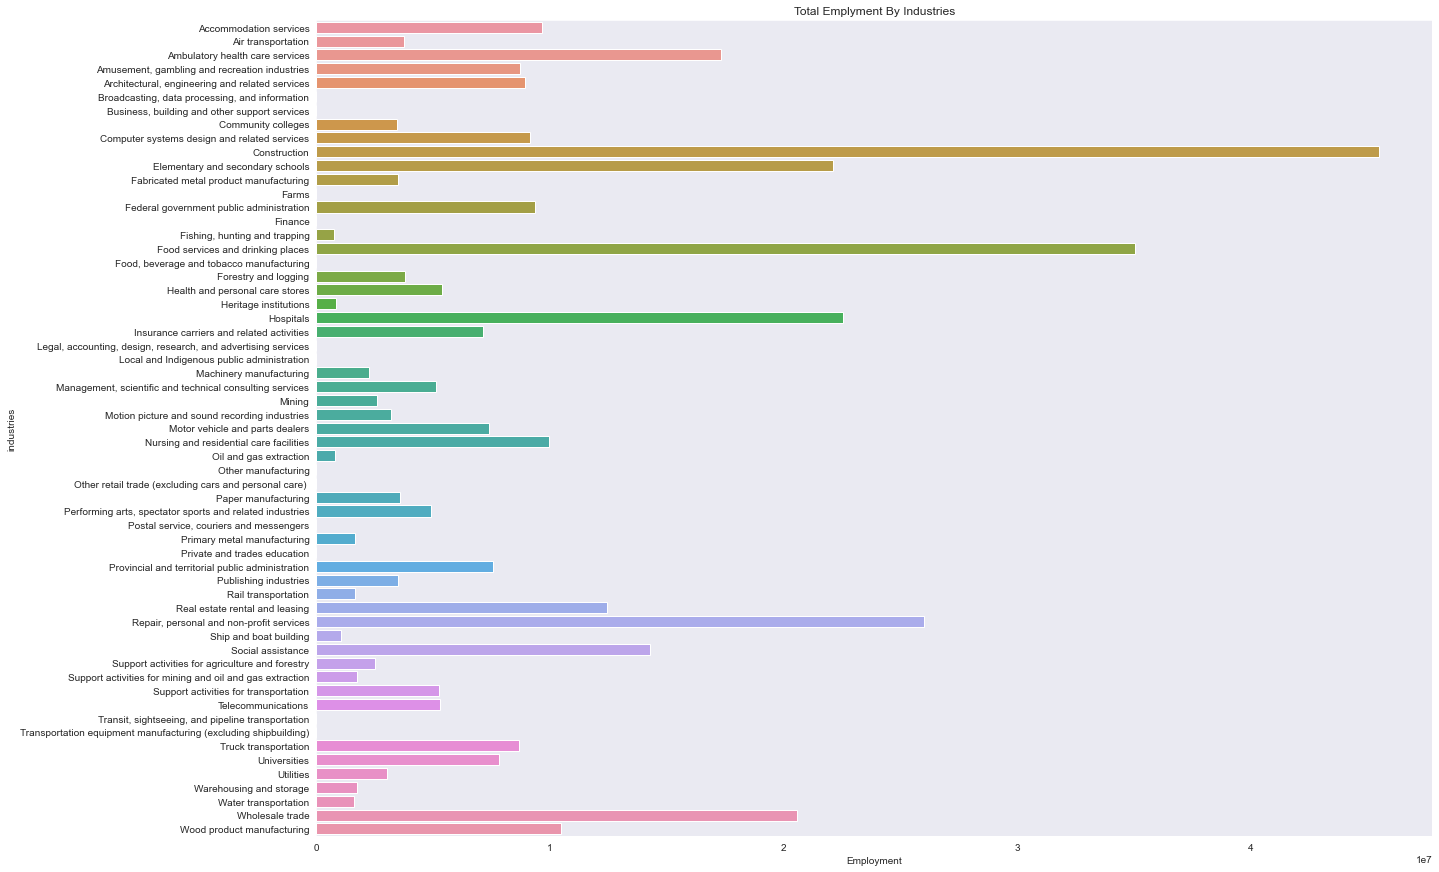

In [74]:
#barplot
sns.set_style('dark')
plt.figure(figsize=(20,15))
sns.barplot(x='Employment',y=employment_industry.index,data=employment_industry,orient ='h')
plt.title('Total Emplyment By Industries')
plt.xlabel('Employment')
plt.ylabel('industries')
plt.savefig('barchart.png')
#plt.xticks(rotation=90)
plt.show()

4- What are the top 5 employing industries ?

In [55]:
#filtering the top 5 industries
top_industries= employment_industry.sort_values(by='Employment',ascending=False)
top_5_industries=top_industries.iloc[:5]
top_5_industries

,Employment
LMO_Detailed_Industry,
Construction,45485000
Food services and drinking places,35033250
"Repair, personal and non-profit services",26021250
Hospitals,22518250
Elementary and secondary schools,22085500


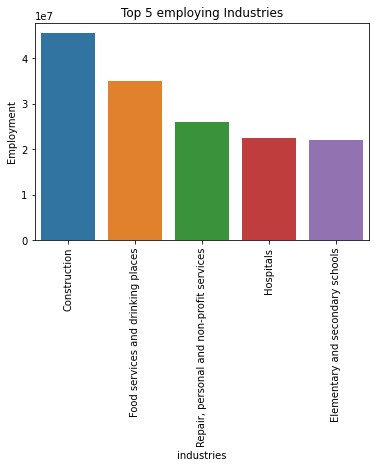

In [56]:
#barplot
sns.barplot(x=top_5_industries.index,y='Employment',data=top_5_industries)
plt.title('Top 5 employing Industries')
plt.xlabel('industries')
plt.ylabel('Employment')
plt.xticks(rotation=90)
plt.show()

5-How did the employment in Construction industry varied over years?

In [57]:
#construction over years
construction_df= DF_OUTPUT[DF_OUTPUT['NAICS_CODE']== 23]
construction_year= pd.DataFrame(construction_df.groupby('SYEAR')['Employment'].mean())
construction_year.head(10)

,Employment
SYEAR,
1997,124145.833333
1998,118729.166667
1999,113625.000000
2000,112145.833333
2001,112270.833333
2002,116791.666667
2003,117666.666667
2004,142083.333333
2005,165750.000000


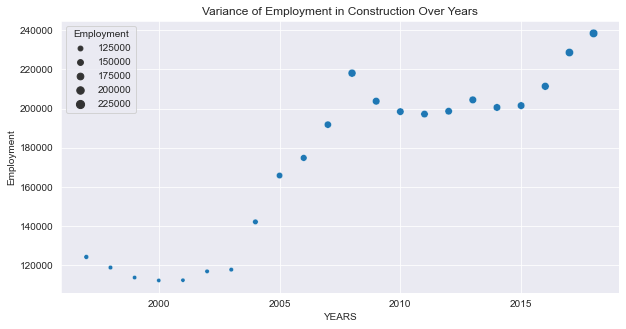

In [75]:
#scatterplot
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.scatterplot(x=construction_year.index, y='Employment',data=construction_year,size='Employment')
plt.title('Variance of Employment in Construction Over Years')
plt.xlabel('YEARS')
plt.ylabel('Employment')
plt.show()

6-How did the employment in Food Services and Drinking places industry varied over years?

In [59]:
# get naics code of Food services and drinking places'
DF_OUTPUT[DF_OUTPUT.LMO_Detailed_Industry == 'Food services and drinking places']['NAICS_CODE'][0]

722

In [61]:
food_drinking_df= DF_OUTPUT[DF_OUTPUT['NAICS_CODE']== 722]
food_drinking_year= pd.DataFrame(food_drinking_df.groupby('SYEAR')['Employment'].mean())
food_drinking_year.head(10)

,Employment
SYEAR,
1997,110645.833333
1998,113187.500000
1999,114583.333333
2000,117687.500000
2001,119979.166667
2002,123604.166667
2003,121958.333333
2004,130291.666667
2005,133770.833333


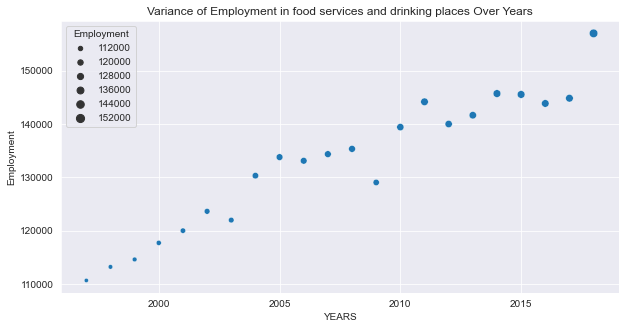

In [76]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.scatterplot(x=food_drinking_year.index, y='Employment',data=food_drinking_year,size='Employment')
plt.title('Variance of Employment in food services and drinking places Over Years')
plt.xlabel('YEARS')
plt.ylabel('Employment')
plt.show()

In [ ]:
7-How did the employment in Repair, personal and non-profit services industry varied over years?

In [63]:
DF_OUTPUT[DF_OUTPUT.LMO_Detailed_Industry == 'Repair, personal and non-profit services']['NAICS_CODE'][0]

81

In [64]:
repair_df= DF_OUTPUT[DF_OUTPUT['NAICS_CODE']== 81]
repair_year= pd.DataFrame(repair_df.groupby('SYEAR')['Employment'].mean())
repair_year.head(10)

,Employment
SYEAR,
1997,90562.500000
1998,92291.666667
1999,105562.500000
2000,98250.000000
2001,98604.166667
2002,96000.000000
2003,93895.833333
2004,92687.500000
2005,88458.333333


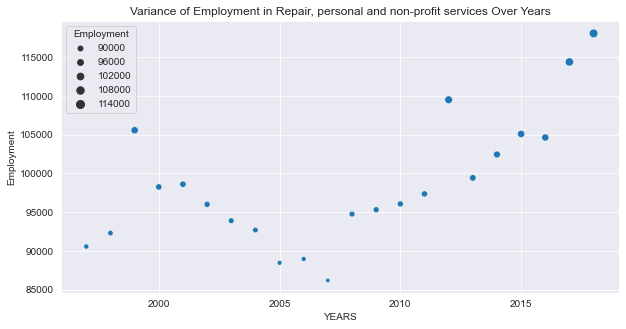

In [77]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.scatterplot(x=repair_year.index, y='Employment',data=repair_year,size='Employment')
plt.title('Variance of Employment in Repair, personal and non-profit services Over Years')
plt.xlabel('YEARS')
plt.ylabel('Employment')
plt.show()

8-How did the employment in top 3 indstries varied over years compared to the total employment variance?

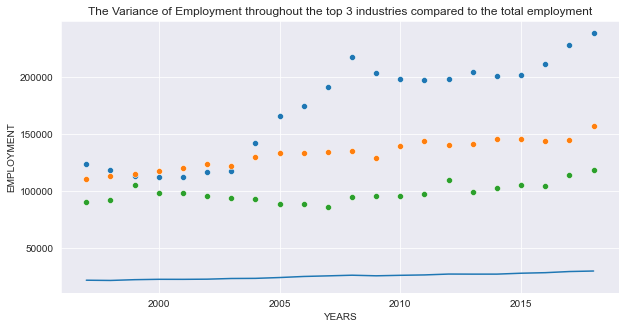

In [78]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.scatterplot(x=construction_year.index, y='Employment',data=construction_year)
sns.scatterplot(x=food_drinking_year.index, y='Employment',data=food_drinking_year)
sns.scatterplot(x=repair_year.index, y='Employment',data=repair_year)
sns.lineplot(data=employment_years)
plt.title("The Variance of Employment throughout the top 3 industries compared to the total employment")
plt.xlabel('YEARS')
plt.ylabel('EMPLOYMENT')
plt.show()

9-What is the industry that have the less contribution in Employment?

In [67]:
low_level_industries= employment_industry.sort_values(by='Employment',ascending=True)
df= low_level_industries[low_level_industries['Employment']!=0]
#low_5_industries=df.iloc[:5]
#low_5_industries
df.nsmallest(1,columns='Employment')

,Employment
LMO_Detailed_Industry,
"Fishing, hunting and trapping",741250


10-How did it evolve comparing to the construction industry and total employment?

In [68]:
DF_OUTPUT[DF_OUTPUT.LMO_Detailed_Industry == 'Fishing, hunting and trapping']['NAICS_CODE'][0]

114

In [69]:
fishing_df= DF_OUTPUT[DF_OUTPUT['NAICS_CODE']== 114]
fish_hunt_year= pd.DataFrame(fishing_df.groupby('SYEAR')['Employment'].mean())
fish_hunt_year.head(10)

,Employment
SYEAR,
1997,5500.000000
1998,3416.666667
1999,3770.833333
2000,4333.333333
2001,4750.000000
2002,3104.166667
2003,4458.333333
2004,2895.833333
2005,2083.333333


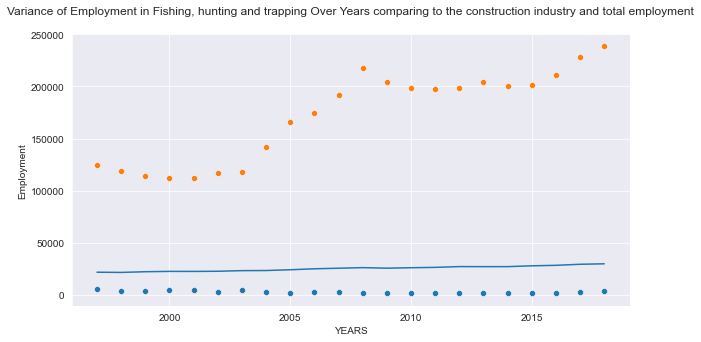

In [79]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.scatterplot(x=fish_hunt_year.index, y='Employment',data=fish_hunt_year)
sns.scatterplot(x=construction_year.index, y='Employment',data=construction_year)
sns.lineplot(data=employment_years)
plt.title('Variance of Employment in Fishing, hunting and trapping Over Years comparing to the construction industry and total employment',y=1.05)
plt.xlabel('YEARS')
plt.ylabel('Employment')
plt.show()